In [1]:
import pandas as pd

In [2]:
di=pd.read_csv("E:/datasets/diabetesLogistic.csv")

In [3]:
di.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
di.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
di_train,di_test=train_test_split(di,test_size=0.2)

In [8]:
di_train_x=di_train.iloc[:,0:-1]
di_train_y=di_train.iloc[:,-1]
di_test_x=di_test.iloc[:,0:-1]
di_test_y=di_test.iloc[:,-1]

In [11]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [12]:
lg.fit(di_train_x,di_train_y)

C:\Users\sunil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
di_pred=lg.predict(di_test_x)

In [15]:
from sklearn.metrics import confusion_matrix

In [17]:
tab1=confusion_matrix(di_pred,di_test_y)
tab1

array([[92, 27],
       [13, 22]], dtype=int64)

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
accuracy_score(di_test_y,di_pred)

0.7402597402597403

In [20]:
from sklearn.metrics import precision_score
precision_score(di_test_y,di_pred)

0.6285714285714286

In [21]:
precision_score(di_pred,di_test_y)

0.4489795918367347

In [22]:
lg.coef_

array([[ 1.74625505e-01,  3.52602526e-02, -1.35528641e-02,
         2.52728989e-03, -8.66013219e-04,  5.45976402e-02,
         1.29770454e+00,  4.28362428e-03]])

In [23]:
lg.intercept_

array([-7.30213289])

array([[0.88226773, 0.11773227],
       [0.51545281, 0.48454719],
       [0.42007328, 0.57992672],
       [0.67321985, 0.32678015],
       [0.2861566 , 0.7138434 ],
       [0.89661171, 0.10338829],
       [0.40819276, 0.59180724],
       [0.92081043, 0.07918957],
       [0.31905374, 0.68094626],
       [0.60417223, 0.39582777],
       [0.86110312, 0.13889688],
       [0.95468049, 0.04531951],
       [0.56968414, 0.43031586],
       [0.63672271, 0.36327729],
       [0.90369883, 0.09630117],
       [0.12029027, 0.87970973],
       [0.65589984, 0.34410016],
       [0.95212649, 0.04787351],
       [0.92421339, 0.07578661],
       [0.42656386, 0.57343614],
       [0.45695766, 0.54304234],
       [0.54739983, 0.45260017],
       [0.30639488, 0.69360512],
       [0.63676218, 0.36323782],
       [0.86689912, 0.13310088],
       [0.90076595, 0.09923405],
       [0.9298469 , 0.0701531 ],
       [0.81721382, 0.18278618],
       [0.79196776, 0.20803224],
       [0.6903725 , 0.3096275 ],
       [0.

In [26]:
di_pred

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [27]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [28]:
roc_auc_score(di_test_y,di_pred)

0.6625850340136055

In [30]:
prob=lg.predict_proba(di_test_x)

In [32]:
prob[:,1]

array([0.11773227, 0.48454719, 0.57992672, 0.32678015, 0.7138434 ,
       0.10338829, 0.59180724, 0.07918957, 0.68094626, 0.39582777,
       0.13889688, 0.04531951, 0.43031586, 0.36327729, 0.09630117,
       0.87970973, 0.34410016, 0.04787351, 0.07578661, 0.57343614,
       0.54304234, 0.45260017, 0.69360512, 0.36323782, 0.13310088,
       0.09923405, 0.0701531 , 0.18278618, 0.20803224, 0.3096275 ,
       0.3847059 , 0.1396627 , 0.23142733, 0.15278582, 0.27368022,
       0.59007812, 0.28042431, 0.63907093, 0.45712287, 0.16801382,
       0.04990508, 0.24333006, 0.08456615, 0.76771186, 0.12145032,
       0.21310724, 0.42892614, 0.35431761, 0.09765342, 0.03635455,
       0.06659614, 0.17662469, 0.32098703, 0.4804576 , 0.37788831,
       0.13977895, 0.05774788, 0.67435311, 0.77956768, 0.24188302,
       0.65216477, 0.34333561, 0.45623397, 0.08763724, 0.15340833,
       0.64364698, 0.38236791, 0.06783842, 0.44087087, 0.07868006,
       0.51665808, 0.25014639, 0.14340442, 0.15558246, 0.44398

In [37]:
fpr,tpr,threshold=roc_curve(di_test_y,prob[:,1])

In [38]:
fpr

array([0.        , 0.00952381, 0.01904762, 0.01904762, 0.02857143,
       0.02857143, 0.03809524, 0.03809524, 0.04761905, 0.04761905,
       0.05714286, 0.05714286, 0.06666667, 0.06666667, 0.0952381 ,
       0.0952381 , 0.12380952, 0.12380952, 0.16190476, 0.16190476,
       0.18095238, 0.18095238, 0.19047619, 0.19047619, 0.2       ,
       0.2       , 0.21904762, 0.21904762, 0.23809524, 0.23809524,
       0.2952381 , 0.2952381 , 0.3047619 , 0.3047619 , 0.31428571,
       0.31428571, 0.40952381, 0.40952381, 0.41904762, 0.41904762,
       0.47619048, 0.47619048, 0.6       , 0.6       , 0.62857143,
       0.62857143, 0.6952381 , 0.6952381 , 0.85714286, 0.85714286,
       1.        , 1.        ])

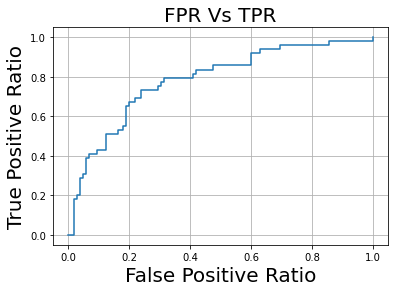

In [40]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.xlabel("False Positive Ratio",size=20)
plt.ylabel("True Positive Ratio",size=20)
plt.title("FPR Vs TPR",size=20)
plt.grid()